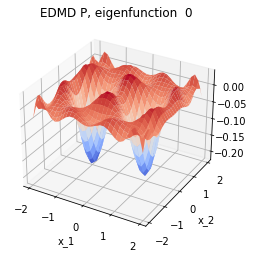

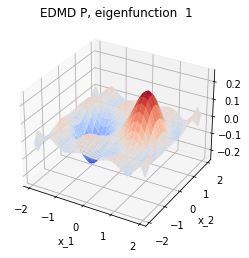

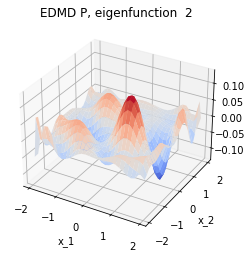

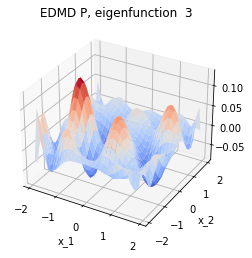

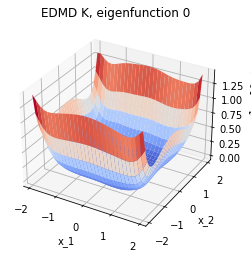

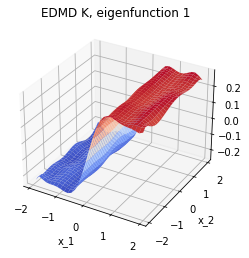

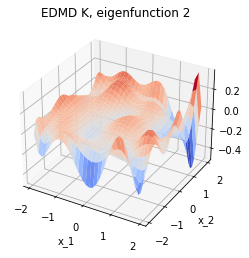

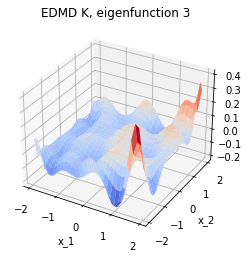

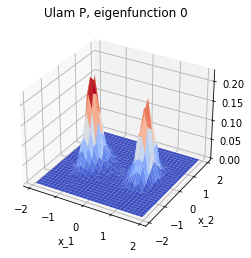

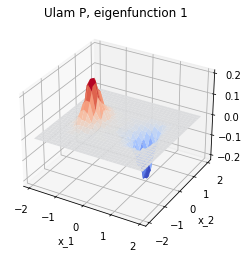

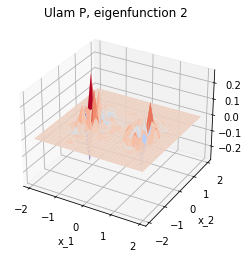

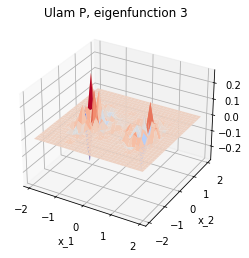

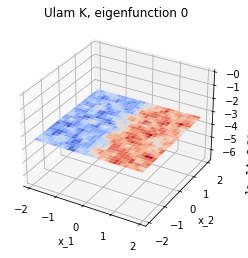

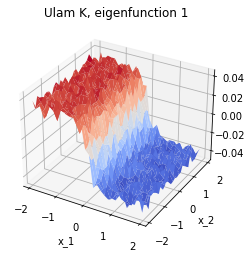

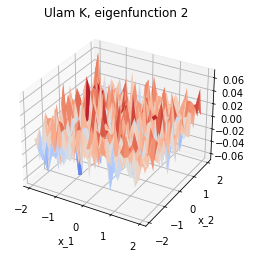

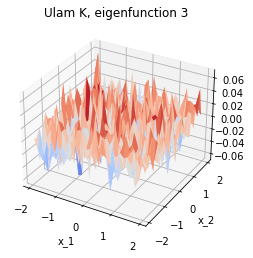

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

from addPath import *
addPath()

from d3s import algorithms
from d3s import domain
from d3s import observables
from d3s import systems
#%% create system

# define domain
bounds = np.array([[-2, 2], [-2, 2]])
boxes = np.array([30, 30])
Omega = domain.discretization(bounds, boxes)

# define system
f = systems.DoubleWell2D(1e-3, 10000)

# generate training data
X = Omega.rand(50000)
Y = f(X) # double-well in two dimensions

# choose observables
psi = observables.monomials(10)
#psi = observables.indicators(Omega)

evs = 4 # number of eigenvalues/eigenfunctions to be computed
PsiC = psi(Omega.midpointGrid()) # observables evaluated at midpoints of the grid

#%% EDMD for Perron-Frobenius operator
_, d, V = algorithms.edmd(X, Y, psi, operator='P', evs=evs)
for i in range(evs):
    plt.figure()
    r = np.real(V[:,i].T @ PsiC)
    Omega.plot(r, '3D')
    plt.title('EDMD P, eigenfunction  %d' % i)

#%% EDMD for Koopman operator    
_, d, V = algorithms.edmd(X, Y, psi, operator='K', evs=evs)
for i in range(evs):
    plt.figure()
    r = np.real(V[:,i].T @ PsiC)
    Omega.plot(r, '3D')
    plt.title('EDMD K, eigenfunction %d' % i)

#%% Ulam's method for Perron-Frobenius operator
d, V = algorithms.ulam(X, Y, Omega, operator='P', evs=evs)
for i in range(evs):
    plt.figure()
    r = np.real(V[:,i])
    Omega.plot(r, '3D')
    plt.title('Ulam P, eigenfunction %d' % i)

#%% Ulam's method for Koopman operator
d, V = algorithms.ulam(X, Y, Omega, operator='K', evs=evs)
for i in range(evs):
    plt.figure()
    r = np.real(V[:,i])
    Omega.plot(r, '3D')
    plt.title('Ulam K, eigenfunction %d' % i)
